In [1]:
import mglearn
mglearn.plots.plot_scaling()

C:\Users\msmpo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\msmpo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
print(x_train.shape)
print(x_test.shape)


(426, 30)
(143, 30)


In [3]:
#from sklearn.preprocessing import MinMaxscaler
#scaler=MinMaxscaller()
#scaler.fit(x_train,y_train)


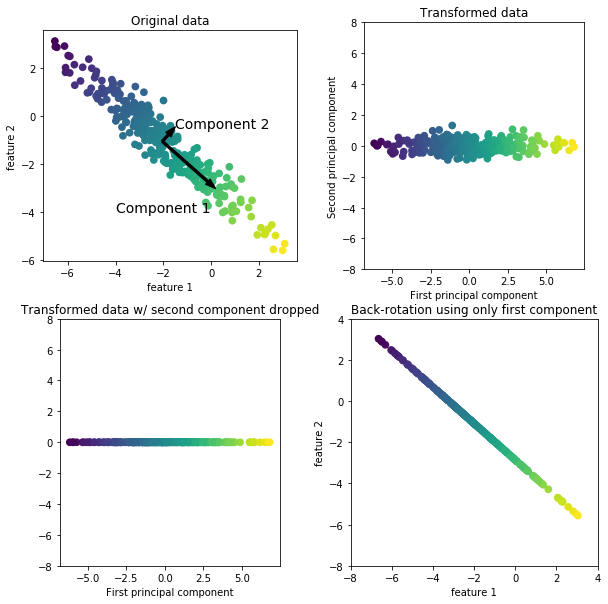

In [4]:
mglearn.plots.plot_pca_illustration()

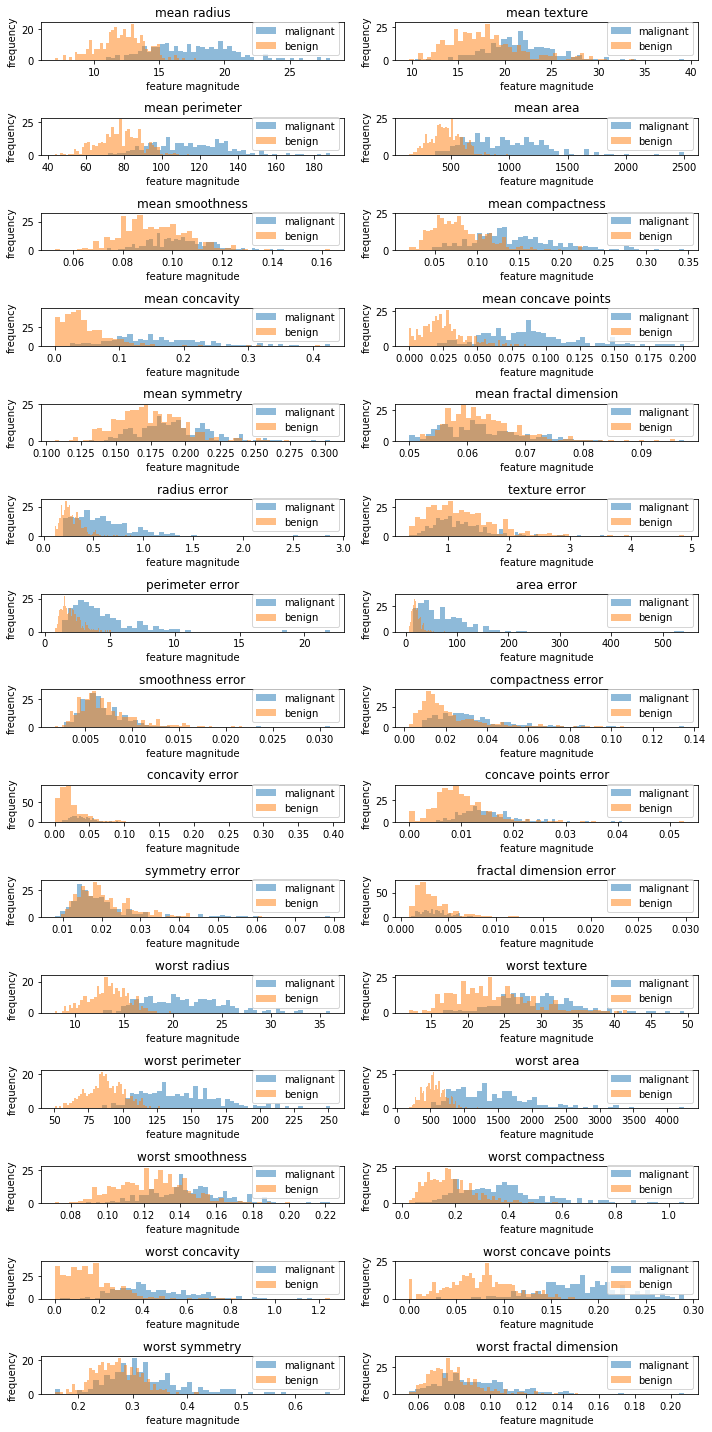

In [5]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]
ax=axes.ravel()
for i in range(30):
    ax[i].hist(malignant[:,i],bins=50,alpha=.5)
    ax[i].hist(benign[:,i],alpha=.5,bins=50)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_xlabel('feature magnitude')
    ax[i].set_ylabel('frequency')
    ax[i].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cancer.data)
x_scaled=scaler.transform(cancer.data)


In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x_scaled)
x_pca=pca.transform(x_scaled)
print('original shape:',x_scaled.shape)
print('reduced shape:',x_pca.shape)

original shape: (569, 30)
reduced shape: (569, 2)


Text(0, 0.5, 'second principal component')

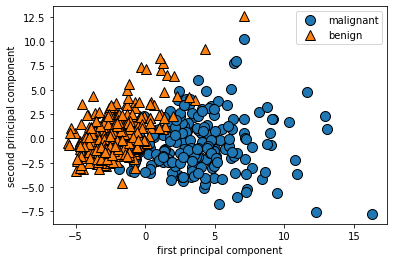

In [8]:
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.xlabel('first principal component')
plt.ylabel('second principal component')

people img shape (755, 87, 65)
people.images[0].shape (87, 65)


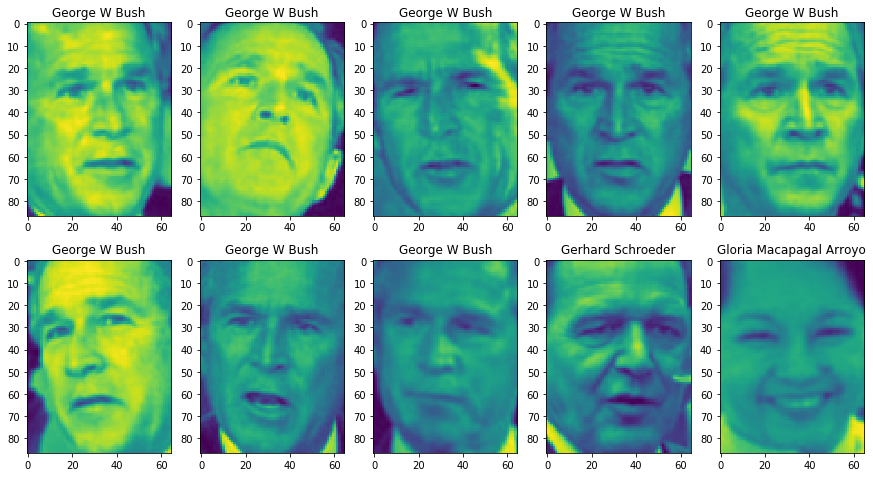

In [10]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)

print('people img shape',people.images.shape)
image_shape=people.images[0].shape
print('people.images[0].shape',image_shape)
fix,axes=plt.subplots(2,5,figsize=(15,8))
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [11]:
import numpy as np
mask=np.zeros(people.target.shape,dtype=np.bool)
print(mask)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
x_people=people.data[mask]
y_people=people.target[mask]
x_people=x_people/255   
print(x_people.shape)



[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [12]:
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False  True False False False False False False False
 False  True False False  True False False False False False  True  True
  True False  True  True  True False False  True False False  True  True
 False False False  True  True False  True False False  True False  True
 False False  True False False False False False False False  True False
 False False False  True False False False False False  True False  True
  True False False False False  True False False False False False False
  True False  True  True False  True  True False Fa

In [13]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x_people,y_people,stratify=y_people,random_state=0)
knn=KNeighborsClassifier(n_neighbors=1).fit(x_train,y_train)
print('test score:{:.2f}'.format(knn.score(x_test,y_test)))


test score:0.61


In [21]:
pca=PCA(n_components=15,whiten=True,random_state=0).fit(x_train)
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)
print('x_train pca shape:',x_train_pca.shape)
knn=KNeighborsClassifier(n_neighbors=1).fit(x_train_pca,y_train)
print('test score:',knn.score(x_test_pca,y_test))

x_train pca shape: (162, 15)
test score: 0.5740740740740741


(15, 5655)


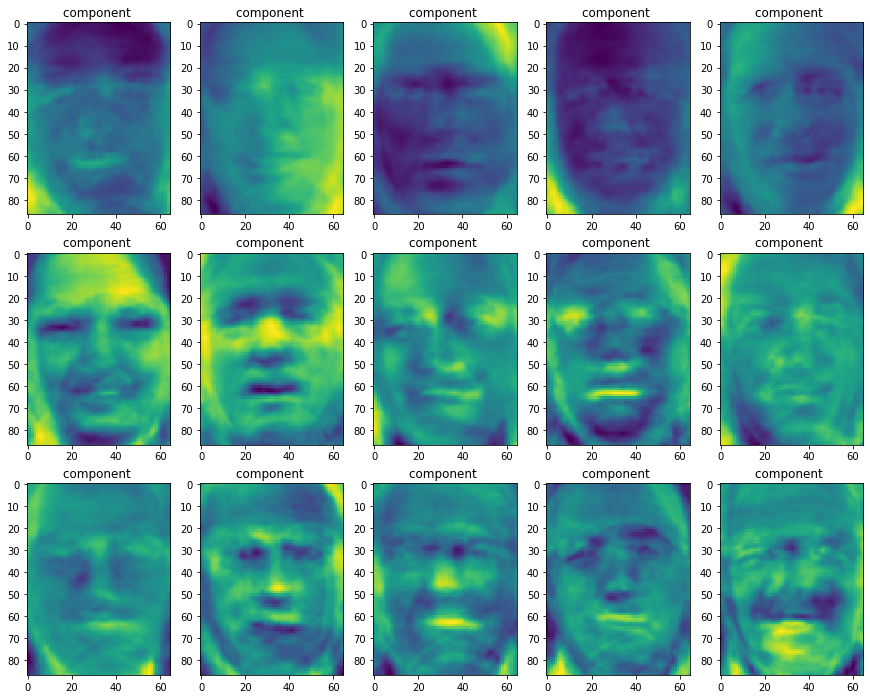

In [25]:
fix,axes=plt.subplots(3,5,figsize=(15,12))
axes=axes.flatten()
print(pca.components_.shape)
for i ,(component,ax) in enumerate(zip(pca.components_,axes)):
    ax.imshow(component.reshape(image_shape) )
    ax.set_title('component ')

In [26]:
#print('to be the best')

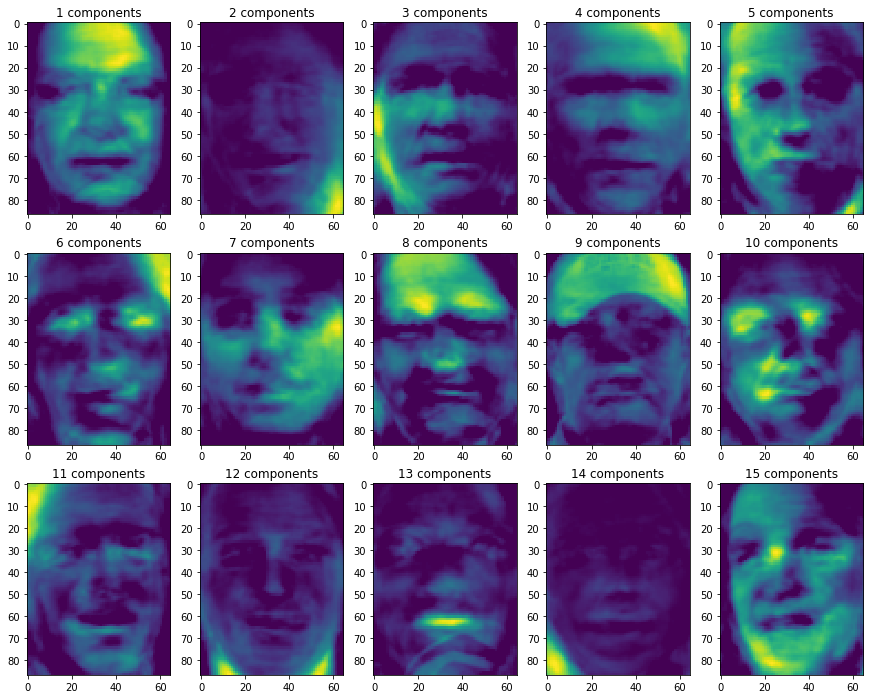

In [28]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15,random_state=0).fit(x_train)
x_train_nmf=nmf.transform(x_train)
x_test_nmf=nmf.transform(x_test)
fig,axes=plt.subplots(3,5,figsize=(15,12))
axes=axes.flatten()
for i ,(ax,component) in enumerate(zip(axes,nmf.components_)):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{} components'.format(i+1))


In [29]:
print(nmf.components_,nmf.components_.shape)
print(nmf.components_[0],nmf.components_[0].shape)
print(nmf.components_[0].reshape(image_shape),nmf.components_[0].reshape(image_shape).shape)
print(image_shape)

[[0.         0.         0.         ... 0.0068939  0.         0.        ]
 [0.         0.         0.         ... 0.57402952 0.53158723 0.46854313]
 [0.05300361 0.03745034 0.01822365 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.01562479 0.         0.        ]
 [0.         0.00082226 0.03025152 ... 0.06495659 0.11586821 0.14496715]
 [0.00336769 0.         0.         ... 0.01739908 0.04349548 0.06396833]] (15, 5655)
[0.        0.        0.        ... 0.0068939 0.        0.       ] (5655,)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00407394 0.         0.        ]
 [0.         0.         0.         ... 0.00386337 0.         0.        ]
 [0.01105362 0.00951899 0.         ... 0.0068939  0.         0.        ]] (87, 65)
(87, 65)


Text(0, 0.5, 'signal')

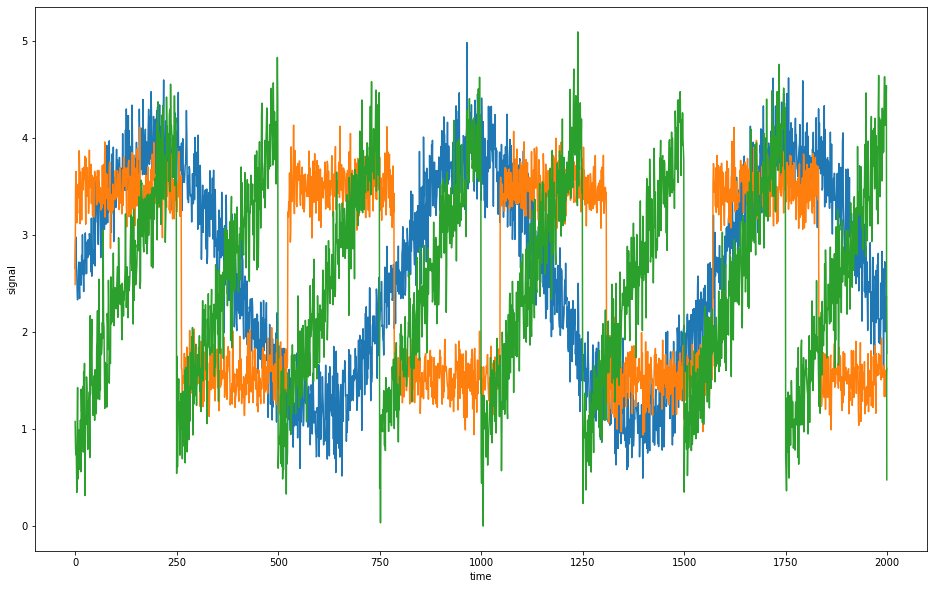

In [30]:
s=mglearn.datasets.make_signals()
plt.figure(figsize=(16,10))
plt.plot(s,'-')
plt.xlabel('time')

plt.ylabel('signal')

In [31]:
a=np.random.RandomState(0).uniform(size=(100,3))
x=np.dot(s,a.T)
print('shape of the measurement:',x.shape)
print(s.shape)
print(a)
print(a.T)
print(a.T.shape)
print(x)
print(s)

shape of the measurement: (2000, 100)
(2000, 3)
[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]
 [0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985]
 [0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329]
 [0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033]
 [0.56843395 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808]
 [0.6818203  0.3595079  0.43703195]
 [0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263 ]
 [0.31542835 0.36371077 0.57019677]
 [0.43860151 0.98837384 0.10204481]
 [0.20887676 0.16130952 0.65310833]
 [0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959]
 [0.13818295 0.19658236 0.36872517]
 [0.82099323 0.09710128 0.83794491]
 [0.09609841 0.97645947 0.4686512 ]
 [0.97676109 0.60484552 0.73926358]
 [0.03918779 0.28280696 0.12019656]
 [0.2961402  0.1

In [32]:
nmf=NMF(n_components=3,random_state=42)
s_=nmf.fit_transform(x)
print('recovered signal shape:',s_.shape)
print(True in s==s_)

recovered signal shape: (2000, 3)
False


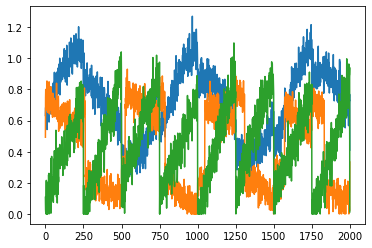

In [33]:
plt.plot(s_,'-')